GaussianNB 42.8571%

KNeighborsClassifier 71.4286%

KNeighborsClassifier 71.4286%

SVC 28.5714%

DecisionTreeClassifier 42.8571%

RandomForestClassifier 42.8571%

AdaBoostClassifier 42.8571%

ExtraTreesClassifier 14.2857%

GradientBoostingClassifier 42.8571%

MLPClassifier 42.8571%



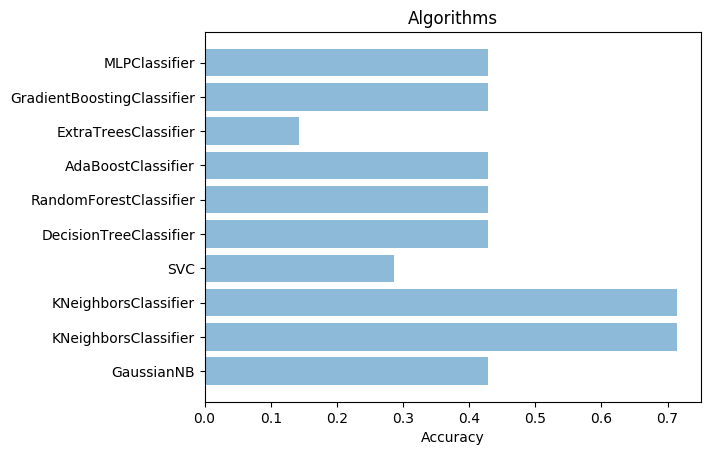

In [10]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,     ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# load the data
from sklearn.tree import DecisionTreeClassifier

# url = "data/lung-cancer.data"
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/lung-cancer/lung-cancer.data"
data_set = pd.read_csv(url)

def clean_data(data_set):
    # replace the ? with NaN
    data_set = data_set.apply(pd.to_numeric, errors='coerce')
    # replace the NaN with the average of the row
    data_set = data_set.fillna(data_set.mean(axis=0), axis=0)

    return data_set

data_set = clean_data(data_set)

def split_data(data_set):
    # split the data in two parts train(80%), test(20%)
    train, test = train_test_split(data_set.values, test_size=0.2)

    # first column of the data are labels
    labels_test = test[:, :1]
    labels_train = train[:, :1]

    # the rest of the columns are features
    features_test = test[:, 1:]
    features_train = train[:, 1:]

    return features_train, labels_train, features_test, labels_test

features_train, labels_train, features_test, labels_test = split_data(data_set)
"""
print(labels_train)
print(features_train)
print(features_test)
print(labels_test)
"""

# Modeling step Test different algorithms
random_state = 2
classifiers = [
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=3),
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel="poly", C=0.4, probability=True),
    DecisionTreeClassifier(random_state=3),
    RandomForestClassifier(random_state=3),
    AdaBoostClassifier(random_state=3),
    ExtraTreesClassifier(random_state=3),
    GradientBoostingClassifier(random_state=3),
    MLPClassifier(solver='lbfgs', hidden_layer_sizes=[100], max_iter=2000, activation='logistic', random_state=random_state)
]

accuracy_res = []
algorithm_res = []
for clf in classifiers:
    clf.fit(features_train, labels_train.ravel())
    name = clf.__class__.__name__

    train_predictions = clf.predict(features_test)

    accuracy = accuracy_score(labels_test, train_predictions)
    print(name, "{:.4%}".format(accuracy))
    accuracy_res.append(accuracy)
    algorithm_res.append(name)
    print()

y_pos = np.arange(len(algorithm_res))
plt.barh(y_pos, accuracy_res, align='center', alpha=0.5)
plt.yticks(y_pos, algorithm_res)
plt.xlabel('Accuracy')
plt.title('Algorithms')
plt.show()